In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/mkthoma/unet_and_vae.git

Cloning into 'unet_and_vae'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 62 (delta 32), reused 46 (delta 20), pack-reused 0
Receiving objects: 100% (62/62), 572.66 KiB | 3.00 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [3]:
import numpy as np # for using np arrays
from unet_and_vae.UNET.dataset import *
from unet_and_vae.UNET.model import *
from unet_and_vae.UNET.utils import *
from unet_and_vae.UNET.train import *

(400, 600, 3)
(400, 600)


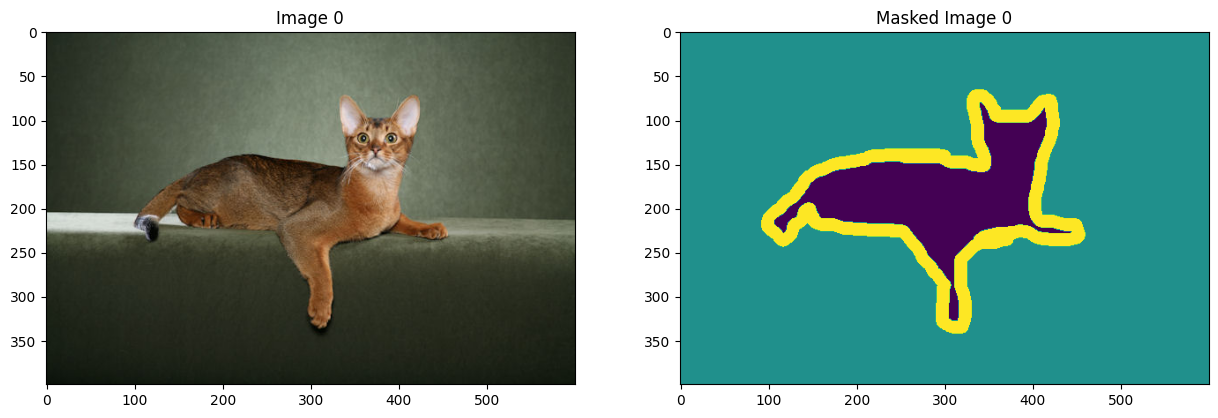

In [4]:
# Load and View Data
""" Load Train Set and view some examples """
# Call the apt function
path1 = '/content/gdrive/MyDrive/ERA_V1/S18/images/images/'
path2 = '/content/gdrive/MyDrive/ERA_V1/S18/annotations/annotations/trimaps/'
img, mask = LoadData(path1, path2)

show_sample_images(path1, path2, img, mask, show_images = 1)

Processing image 7390 out of 7390 images
X Shape: (7390, 128, 128, 3)
Y shape: (7390, 128, 128, 1)


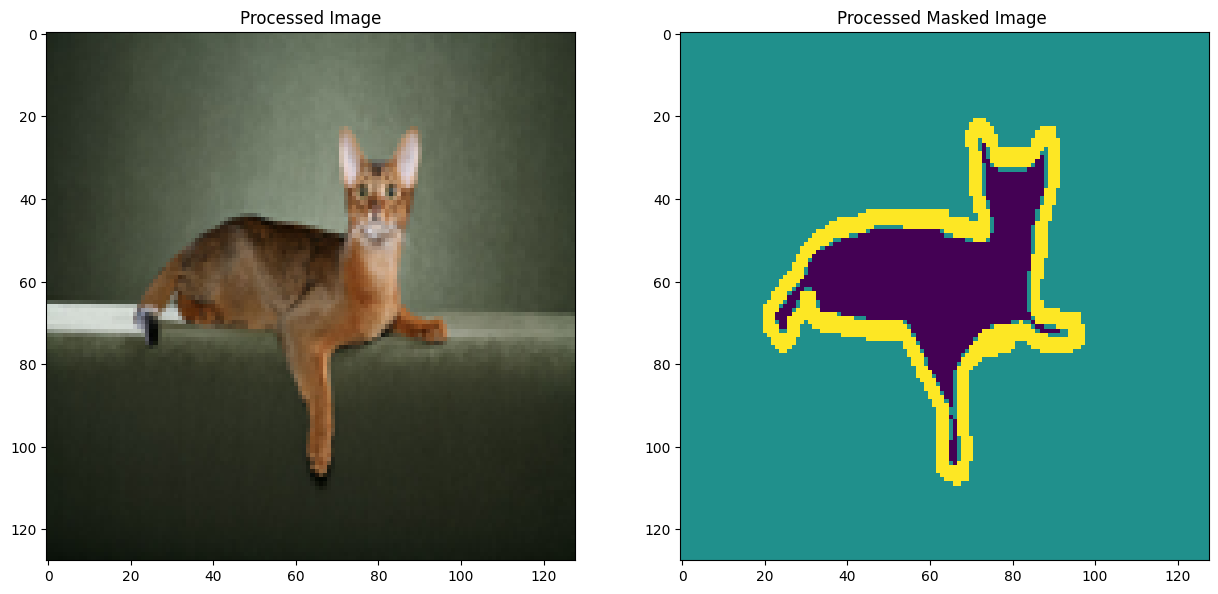

In [5]:
# Process Data
# Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]

# Process data using apt helper function
X, y = PreprocessData(img, mask, target_shape_img, target_shape_mask, path1, path2)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)
print("Y shape:", y.shape)
# There are 3 classes : background, pet, outline

show_processed_image(X, y, image_index = 0)

## Max Pooling + Transpose Conv + Binary Cross-Entropy

Model Summary:
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_220 (Conv2D)         (None, 128, 128, 32)         896       ['input_12[0][0]']            
                                                                                                  
 conv2d_221 (Conv2D)         (None, 128, 128, 32)         9248      ['conv2d_220[0][0]']          
                                                                                                  
 batch_normalization_55 (Ba  (None, 128, 128, 32)         128       ['conv2d_221[0][0]']          
 tchNormalization)                                                          

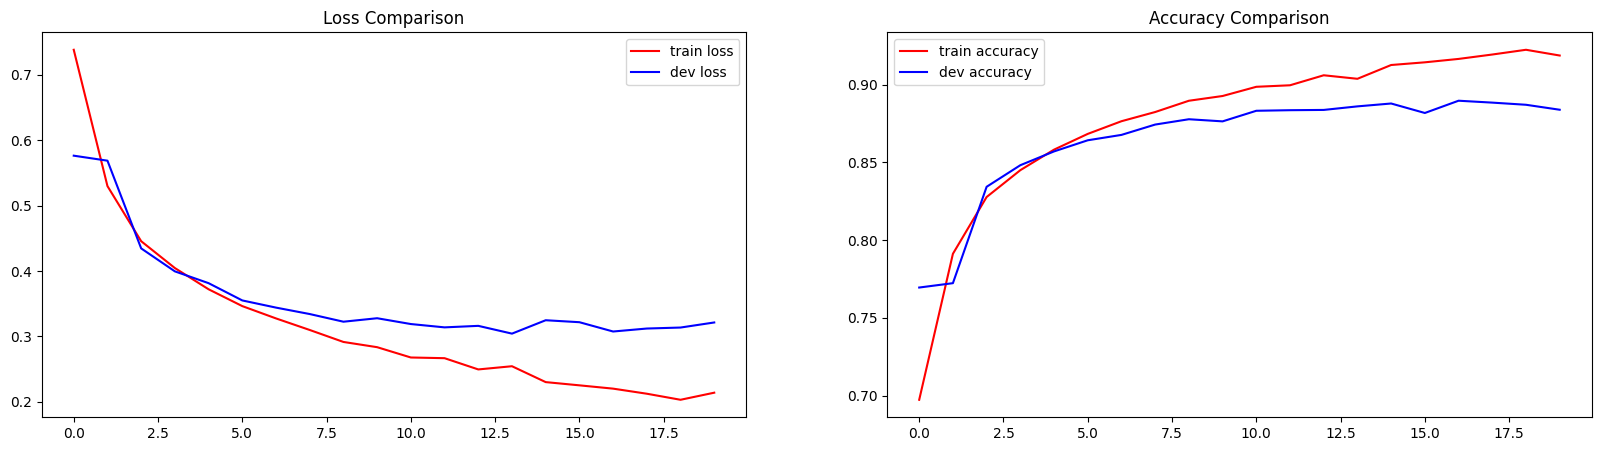

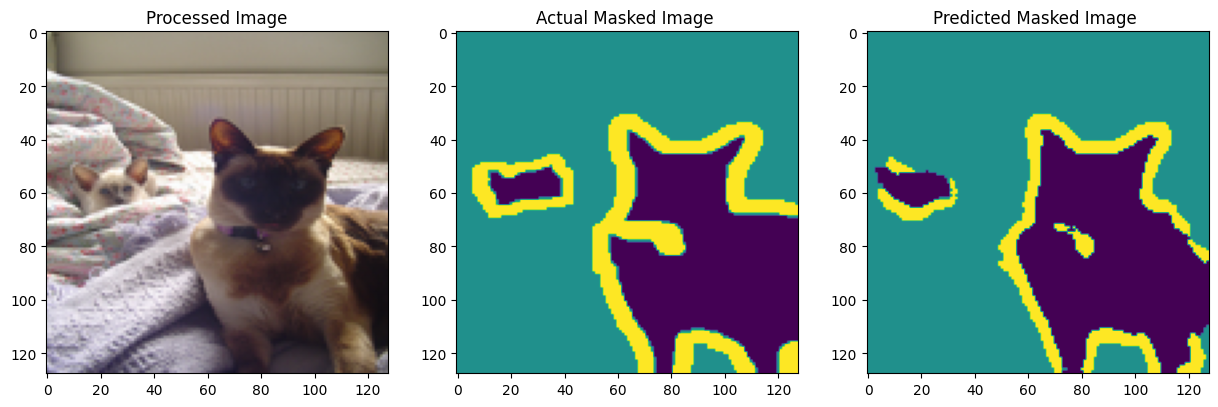

In [28]:
# Model Initialization
# # MP+Tr+BCE
unet = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,use_upsampling=False, use_dice_loss=False, use_bce=True)

# # StrConv+Tr+BCE
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
#                     use_upsampling=False, use_dice_loss=False, use_bce=True)

# # StrConv+Ups+Dice Loss
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
#                     use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
VisualizeResults(X_valid, unet, y_valid, index)

## Max Pooling + Transpose Conv + Dice Loss

Model Summary:
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_240 (Conv2D)         (None, 128, 128, 32)         896       ['input_13[0][0]']            
                                                                                                  
 conv2d_241 (Conv2D)         (None, 128, 128, 32)         9248      ['conv2d_240[0][0]']          
                                                                                                  
 batch_normalization_60 (Ba  (None, 128, 128, 32)         128       ['conv2d_241[0][0]']          
 tchNormalization)                                                          

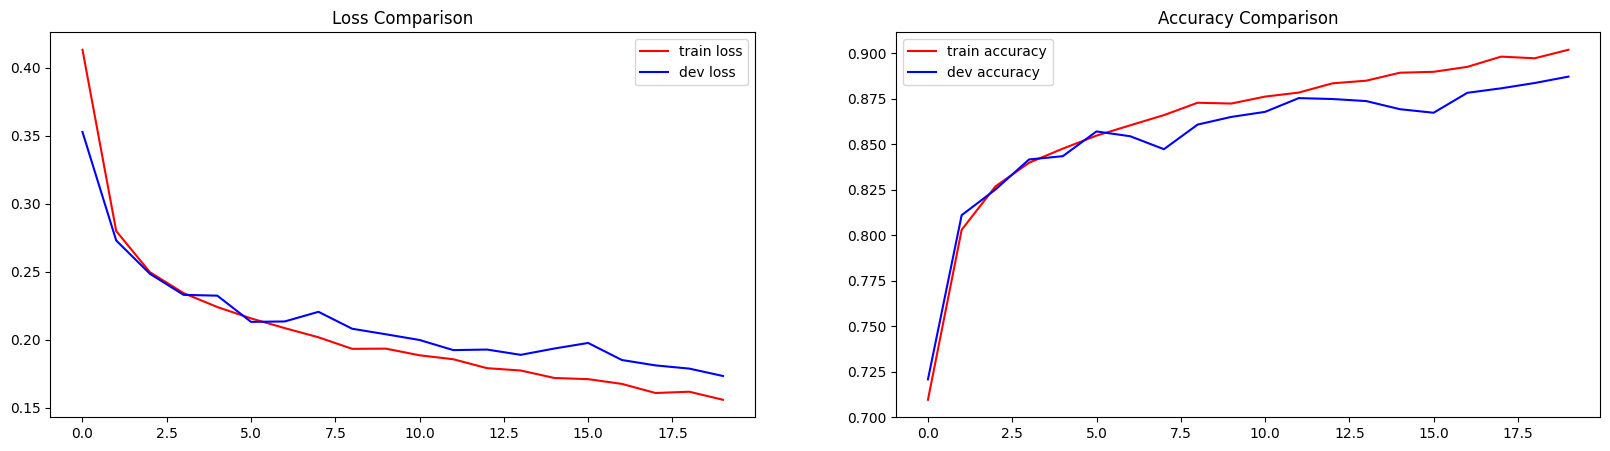

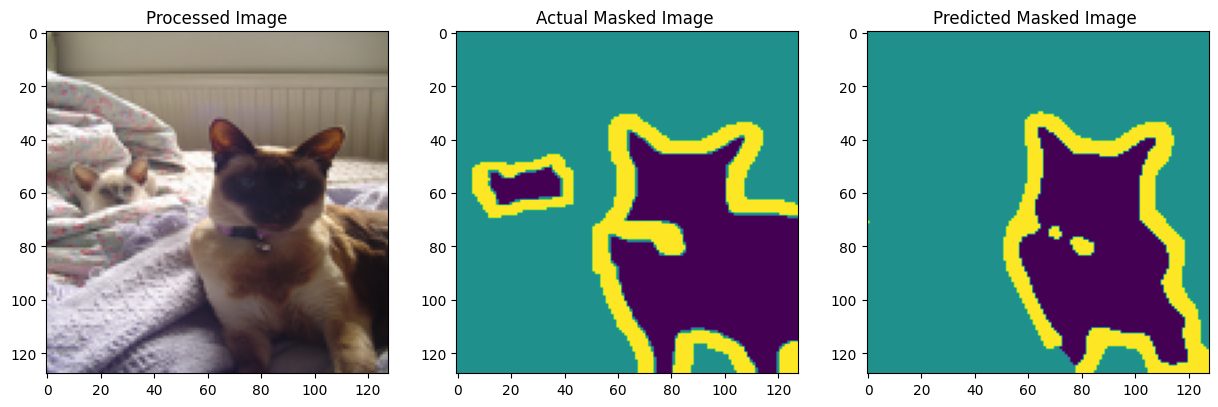

In [29]:
# Model Initialization
# # MP+Tr+Dice Loss
unet = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,
                    use_upsampling=False, use_dice_loss=True, use_bce=False)

# # StrConv+Tr+BCE
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
#                     use_upsampling=False, use_dice_loss=False, use_bce=True)

# # StrConv+Ups+Dice Loss
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
#                     use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
VisualizeResults(X_valid, unet, y_valid, index)

## Strided Convolution + Transpose Conv + Binary Cross Entropy

Model Summary:
Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_260 (Conv2D)         (None, 128, 128, 32)         896       ['input_14[0][0]']            
                                                                                                  
 conv2d_261 (Conv2D)         (None, 128, 128, 32)         9248      ['conv2d_260[0][0]']          
                                                                                                  
 batch_normalization_65 (Ba  (None, 128, 128, 32)         128       ['conv2d_261[0][0]']          
 tchNormalization)                                                          

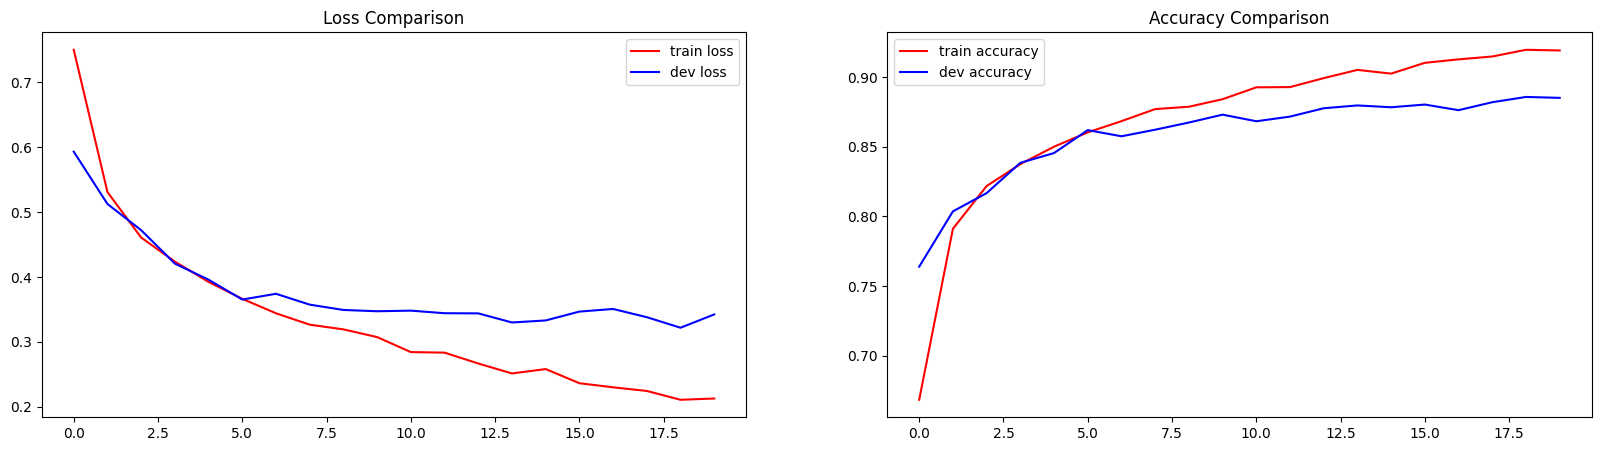

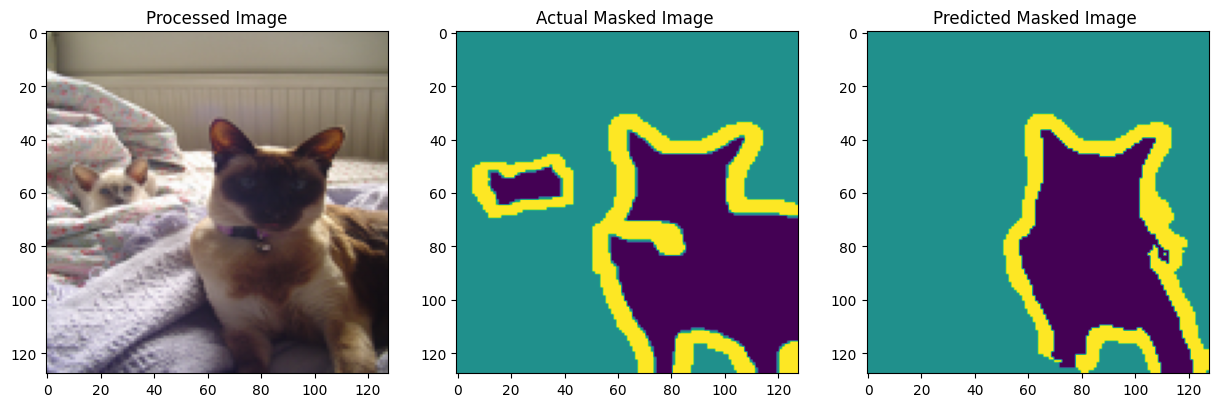

In [30]:
# Model Initialization
# # StrConv+Tr+BCE
unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
                    use_upsampling=False, use_dice_loss=False, use_bce=True)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
VisualizeResults(X_valid, unet, y_valid, index)

## Strided Conv + Up Sampling + Dice Loss

Model Summary:
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_284 (Conv2D)         (None, 128, 128, 32)         896       ['input_15[0][0]']            
                                                                                                  
 conv2d_285 (Conv2D)         (None, 128, 128, 32)         9248      ['conv2d_284[0][0]']          
                                                                                                  
 batch_normalization_70 (Ba  (None, 128, 128, 32)         128       ['conv2d_285[0][0]']          
 tchNormalization)                                                          

1/1 [==============================] - 0s 290ms/step


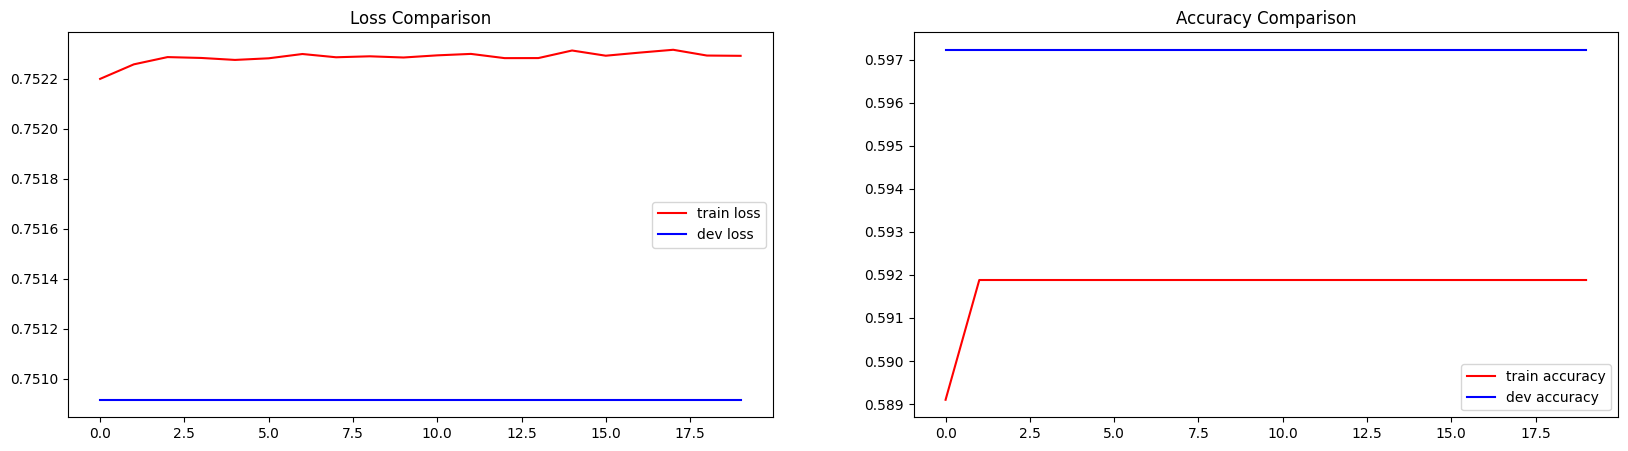

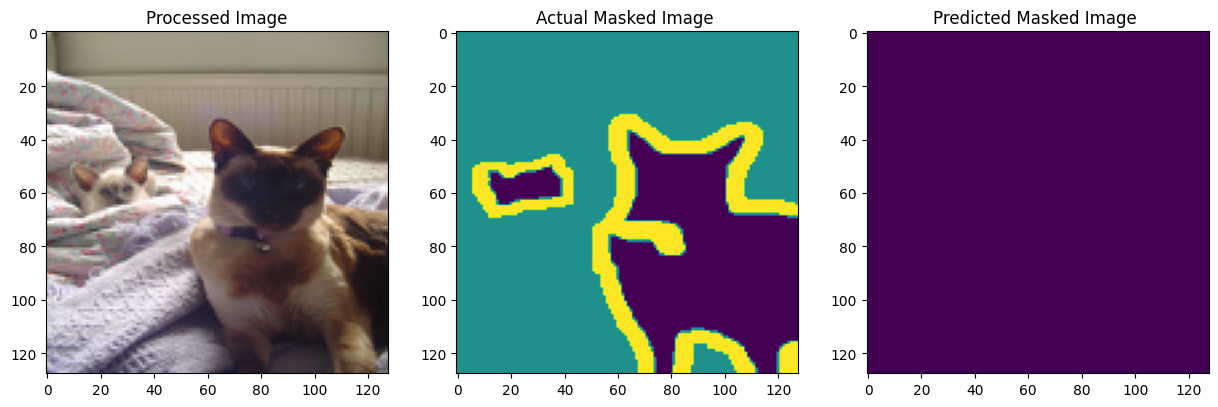

In [31]:
# Model Initialization
# # StrConv+Ups+Dice Loss
unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
                    use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
VisualizeResults(X_valid, unet, y_valid, index)